# Table of Content

<a id='top'></a>

1. [Create DataFrame](#df)
2. [Cleaning](#cleaning)
3. [Users & Groups](#individual_stats)
4. [Purchases](#purchase_stats)
5. [Same Day Purchases](#same_day_purchase_stats)
6. [Stat Summary](#summary)
7. [Visuals](#visuals)
8. [Group Visuals](#group_visuals)
            

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans, ttest_ind
from scipy.stats import ttest_ind
import numpy as np
import random

sns.set(style='darkgrid')

# DataFrame
<a id='df'></a>

In [2]:
all_data = pd.read_csv('./datasets/all_data_merged.csv')
all_data.head()

,id,country,gender,uid,group,join_dt,device,uid-2,dt,device-2,spent
0,1000000,CAN,M,1000000,B,2023-01-28,I,NaN,NaN,NaN,NaN
1,1000001,BRA,M,1000001,A,2023-01-27,A,NaN,NaN,NaN,NaN
2,1000002,FRA,M,1000002,A,2023-02-01,A,NaN,NaN,NaN,NaN
3,1000003,BRA,M,1000003,B,2023-01-25,I,NaN,NaN,NaN,NaN
4,1000004,DEU,F,1000004,A,2023-02-04,A,NaN,NaN,NaN,NaN


# Cleaning Data

<a id='cleaning'></a>

### Change Columns dt and join_dt to date type

In [3]:
all_data['purchase_date'] = pd.to_datetime(all_data['dt'])
all_data['joined_date'] = pd.to_datetime(all_data['join_dt'])

## Rearrange columns and rename values

In [4]:
all_data = all_data.drop(columns=['uid', 'join_dt', 'uid-2', 'dt', 'device-2'])

all_data = all_data.reindex(columns=['id', 'joined_date', 'group', 'gender', 'country', 'device', 'purchase_date','spent'])

In [5]:
def replace_group(group):
    if group == 'A':
        return 'Control_Group'
    elif group == 'B':
        return 'Test_Group'
    else:
        return group
    
all_data['group'] = all_data['group'].apply(replace_group)

In [6]:
def replace_device_name(device):
    if device == 'I':
        return 'iOS'
    elif device == 'A':
        return 'Android'
    else:
        return device
    
all_data['device'] = all_data['device'].apply(replace_device_name)

## Create purchase status column for those who made a purchase

In [7]:
all_data['purchase_status'] = np.where(all_data['purchase_date'].isnull(), 0, 1)

In [8]:
all_data.head()

,id,joined_date,group,gender,country,device,purchase_date,spent,purchase_status
0,1000000,2023-01-28,Test_Group,M,CAN,iOS,NaT,NaN,0
1,1000001,2023-01-27,Control_Group,M,BRA,Android,NaT,NaN,0
2,1000002,2023-02-01,Control_Group,M,FRA,Android,NaT,NaN,0
3,1000003,2023-01-25,Test_Group,M,BRA,iOS,NaT,NaN,0
4,1000004,2023-02-04,Control_Group,F,DEU,Android,NaT,NaN,0


[Back to top](#top)

# Users & Groups

### To view summary stats please click here: [Summary Stats](#summary)

<a id='individual_stats'></a>

### Users

In [9]:
total_unique_users = all_data['id'].nunique()

In [10]:
all_data['duplicates'] = all_data.duplicated(subset=['id'], keep=False)
duplicates = all_data[all_data['duplicates'] == True]['id'].nunique()

### Groups

In [11]:
control_group = all_data[all_data['group'] == 'Control_Group']

In [12]:
num_unique_users_control_group = control_group['id'].nunique()

In [13]:
test_group = all_data[all_data['group'] == 'Test_Group']

In [14]:
num_unique_users_test_group = test_group['id'].nunique()

[Back to top](#top)

In [15]:
control_group

,id,joined_date,group,gender,country,device,purchase_date,spent,purchase_status,duplicates
1,1000001,2023-01-27,Control_Group,M,BRA,Android,NaT,NaN,0,False
2,1000002,2023-02-01,Control_Group,M,FRA,Android,NaT,NaN,0,False
4,1000004,2023-02-04,Control_Group,F,DEU,Android,NaT,NaN,0,False
7,1000007,2023-01-25,Control_Group,F,BRA,Android,NaT,NaN,0,False
8,1000008,2023-02-05,Control_Group,F,BRA,Android,NaT,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...
49069,1049987,2023-01-26,Control_Group,M,BRA,iOS,NaT,NaN,0,False
49071,1049989,2023-01-25,Control_Group,M,MEX,iOS,NaT,NaN,0,False
49075,1049993,2023-01-25,Control_Group,M,USA,Android,NaT,NaN,0,False
49076,1049994,2023-01-25,Control_Group,F,USA,Android,NaT,NaN,0,False


# Purchases 

<a id='purchase_stats'></a>

In [16]:
user_purchased = all_data[all_data['purchase_status'] != 0]
user_purchased_by_id = user_purchased.groupby('id')['purchase_status'].sum()
user_purchased_by_id = user_purchased_by_id.sort_values(ascending=False).reset_index()
num_users_who_purchased = user_purchased_by_id['id'].nunique()

In [17]:
total_purchases = all_data[all_data['purchase_status'] != 0]
total_purchases = total_purchases['purchase_status'].count()

In [18]:
non_purchased = all_data[all_data['purchase_status'] == 0]['purchase_status'].count()

In [19]:
control_group_unique_users = control_group[control_group['purchase_status'] == 1]
control_group_unique_users = control_group_unique_users['id'].nunique()

In [20]:
test_group_num_unique_users = test_group[test_group['purchase_status'] == 1]
test_group_num_unique_users = test_group_num_unique_users['id'].nunique()

In [21]:
control_and_test_group_unique_users = test_group_num_unique_users + control_group_unique_users

In [22]:
total_purchases_control_group = control_group['purchase_status'].sum()

In [23]:
total_purchases_test_group = test_group['purchase_status'].sum()

In [24]:
total_not_same_day_purchase = all_data[(all_data['joined_date'] != all_data['purchase_date']) & (all_data['purchase_status'] == 1)].reset_index()
total_not_same_day_purchase = total_not_same_day_purchase['id'].count()

In [25]:
total_not_same_day_purchase_unique_id = all_data[(all_data['joined_date'] != all_data['purchase_date']) & (all_data['purchase_status'] == 1)].reset_index()
total_not_same_day_purchase_unique_id = total_not_same_day_purchase_unique_id['id'].nunique()

In [26]:
not_same_day_unique_id_multiple_purchase = total_not_same_day_purchase - total_not_same_day_purchase_unique_id

# Same Day Purchases

<a id='same_day_purchase_stats'></a>



In [27]:
num_users_who_purchased_one = user_purchased_by_id[user_purchased_by_id['purchase_status'] == 1]
num_users_who_purchased_one = num_users_who_purchased_one['id'].nunique()

In [28]:
num_users_who_purchased_multiple = user_purchased_by_id[user_purchased_by_id['purchase_status'] > 1]
num_users_who_purchased_twice = num_users_who_purchased_multiple['id'].nunique()

In [29]:
same_day_purchases = all_data[all_data['joined_date'] == all_data['purchase_date']].reset_index()
same_day_purchases = same_day_purchases['purchase_status'].count()

In [30]:
control_same_day_purchase = control_group[control_group['joined_date'] == control_group['purchase_date']].reset_index()
control_same_day_purchase = control_same_day_purchase['purchase_status'].sum()

In [31]:
test_same_day_purchase = test_group[test_group['joined_date'] == test_group['purchase_date']].reset_index()
test_same_day_purchase = test_same_day_purchase['purchase_status'].sum()

# Purchases by Group

## Control Group

In [32]:
control_group_purchased = control_group[control_group['purchase_status'] == 1]

In [33]:
control_total_num_purchases = control_group[control_group['purchase_status'] == 1]['purchase_status'].sum()
control_total_num_purchases

1014

In [34]:
control_group_unique_users = all_data[all_data['group'] == 'Control_Group']['id'].nunique()
control_group_unique_users

24343

In [35]:
control_group_unique_purchases = control_group[control_group['purchase_status'] == 1]['id'].nunique()
control_group_unique_purchases

955

In [36]:
control_cr = (control_group_unique_purchases / control_group_unique_users) * 100
control_cr

3.9230990428459926

In [37]:
control_total_spent = control_group['spent'].sum()

In [38]:
control_average_spent = control_group['spent'].mean()
control_average_spent

81.01173872267435

In [39]:
control_spent_per_user = control_total_spent / num_unique_users_control_group
print('${:.3f}'.format(control_spent_per_user))

$3.375


## Test Group

In [40]:
test_group_purchased = test_group[test_group['purchase_status'] == 1]

In [41]:
test_total_num_purchases = test_group[test_group['purchase_status'] == 1]['purchase_status'].sum()
test_total_num_purchases

1219

In [42]:
test_group_unique_users = all_data[all_data['group'] == 'Test_Group']['id'].nunique()
test_group_unique_users

24600

In [43]:
test_group_unique_purchases = test_group[test_group['purchase_status'] == 1]['id'].nunique()
test_group_unique_purchases

1139

In [44]:
test_cr = (test_group_unique_purchases / test_group_unique_users) * 100
test_cr

4.630081300813008

In [45]:
test_total_spent = test_group['spent'].sum()

In [46]:
test_average_spent = test_group['spent'].mean()

In [47]:
test_spent_per_user = test_total_spent / num_unique_users_test_group
print('${:.3f}'.format(test_spent_per_user))

$3.391


In [48]:
all_groups_total_amount_spent = control_total_spent + test_total_spent

# Ratios

In [49]:
total_same_day_purchase = control_same_day_purchase + test_same_day_purchase

In [50]:
control_group_ratio = (num_unique_users_control_group / total_unique_users) * 100
test_group_ratio = (num_unique_users_test_group / total_unique_users) * 100

group_users_diff = num_unique_users_test_group - num_unique_users_control_group
group_users_diff_ratio = (group_users_diff / total_unique_users) * 100

In [51]:
purchase_ratio = (num_users_who_purchased / total_unique_users) * 100 

In [52]:
total_spent = all_data['spent'].sum()
total_spent

165561.22993358204

In [53]:
all_groups_spent_avg = all_data['spent'].mean()
all_groups_spent_avg

74.14296011356124

[Back to top](#top)
<a id='summary'></a>

# Summary - Users 


In [54]:
print('Total number of unique users                  : {}'.format(total_unique_users))
print('Total number of unique users in Control Group : {}'.format(num_unique_users_control_group))
print('Total number of unique users in Test Group    : {}'.format(num_unique_users_test_group))
print('Difference in Group                           : {} users'.format(group_users_diff))
print('Percent of users in Control Group             : {:.3f}%'.format(control_group_ratio))
print('Percent of users in Test Group                : {:.3f}%'.format(test_group_ratio))
print('Difference in Group Ratio                     : {:.3f}%'.format(group_users_diff_ratio))
print('Average Spend (all groups)                    : ${:.3f}'.format(all_groups_spent_avg))


Total number of unique users                  : 48943
Total number of unique users in Control Group : 24343
Total number of unique users in Test Group    : 24600
Difference in Group                           : 257 users
Percent of users in Control Group             : 49.737%
Percent of users in Test Group                : 50.263%
Difference in Group Ratio                     : 0.525%
Average Spend (all groups)                    : $74.143


# Summary - Purchases

In [55]:
print('Total number of purchases: {}'.format(total_purchases))
print('Total number of unique users who made a purchase: {}'.format(num_users_who_purchased))
print("Total number of unique users who did not make a purchase: {}".format(non_purchased))
print('Total number of unique users who made a purchase on the same date as Join Date: {}'.format(total_same_day_purchase))
print('Total number of unique users who did not make a purchase on the same date as Join Date: {}'.format(total_not_same_day_purchase))
print('Total number of unique users who did not make a purchase on the same date as Join Date and had multiple purchases: {}'.format(not_same_day_unique_id_multiple_purchase))
print('Total number of unique users who made 1 purchase: {}'.format(num_users_who_purchased_one))
print('Total number of unique users who purchased twice: {}'.format(num_users_who_purchased_twice))
print('Purchase Ratio: {:.3f}%'.format(purchase_ratio))

Total number of purchases: 2233
Total number of unique users who made a purchase: 2094
Total number of unique users who did not make a purchase: 46849
Total number of unique users who made a purchase on the same date as Join Date: 1648
Total number of unique users who did not make a purchase on the same date as Join Date: 585
Total number of unique users who did not make a purchase on the same date as Join Date and had multiple purchases: 16
Total number of unique users who made 1 purchase: 1955
Total number of unique users who purchased twice: 139
Purchase Ratio: 4.278%


# Summary - Group Purchases

In [56]:
print('Total number of purchases                    : {}'.format(total_purchases))
print('Total amount spent                           : ${:.2f}'.format(all_groups_total_amount_spent))
print('\n')
print('Control Group')
print('Control Group total number of unique users   : {}'.format(num_unique_users_control_group))
print('Control Group total number of purchases      : {}'.format(control_total_num_purchases))
print('Control Group total number of unique purchases: {}'.format(control_group_unique_purchases))
print('Spent:')
print('Control Group total amount of spent          : {:.2f}'.format(control_total_spent))
print('Control Group average amount spent           : ${:.2f}'.format(control_average_spent))
print('Test Group average spent per user            : ${:.2f}'.format(control_spent_per_user))
print('Control Group Convertion Rate                : {:.2f}%'.format(control_cr))
print('\n')
print('Test Group')
print('Test Group total number of unique users      : {}'.format(num_unique_users_test_group))
print('Test Group total number of purchases         : {}'.format(test_total_num_purchases))
print('Test Group total number of unique purchases  : {}'.format(test_group_unique_purchases))
print('Spent:')
print('Test Group total amount of spent             : {:.2f}'.format(test_total_spent))
print('Test Group average amount spent              : ${:.2f}'.format(test_average_spent))
print('Test Group average spent per user            : ${:.2f}'.format(test_spent_per_user))
print('Test Group Convertion Rate                   : {:.2f}%'.format(test_cr))

Total number of purchases                    : 2233
Total amount spent                           : $165561.23


Control Group
Control Group total number of unique users   : 24343
Control Group total number of purchases      : 1014
Control Group total number of unique purchases: 955
Spent:
Control Group total amount of spent          : 82145.90
Control Group average amount spent           : $81.01
Test Group average spent per user            : $3.37
Control Group Convertion Rate                : 3.92%


Test Group
Test Group total number of unique users      : 24600
Test Group total number of purchases         : 1219
Test Group total number of unique purchases  : 1139
Spent:
Test Group total amount of spent             : 83415.33
Test Group average amount spent              : $68.43
Test Group average spent per user            : $3.39
Test Group Convertion Rate                   : 4.63%


In [57]:
# calculate the number of days between the first and last date
join_days = (all_data['joined_date'].max() - all_data['joined_date'].min()).days + 1
print(f"Number of days in trial period: {join_days} days")

Number of days in trial period: 13 days


In [58]:
all_data.to_csv('./datasets/all_data_final.csv')

[Back to top](#top)

## Visuals
<a id='visuals'></a>

### All Data Spent Distribution

All Data Mean Spent: $ 74.14
All Data Median Spent: $ 56.01
All Data Max Spent: $ 1659.4
All Data Mode Spent: $ 56.01
All Data Range of Spent: $ 1659.0600000000002
All Data Interquartile range:  56.79
All Data Standard deviation:  92.64
Number of outliers:  93


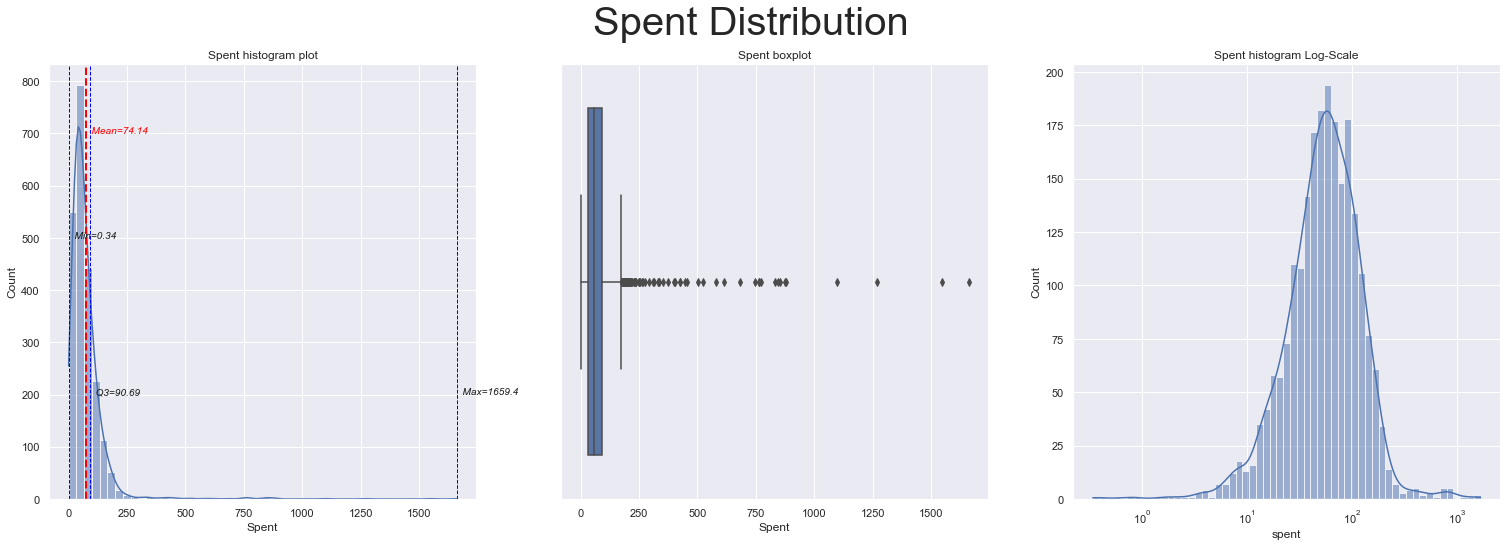

In [59]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[26, 8])

all_spent_mean = np.round(all_data["spent"].mean(), 2)
all_spent_min = np.round(all_data["spent"].min(), 2)
all_spent_max = np.round(all_data["spent"].max(), 2)

# main title:
fig.suptitle("Spent Distribution", fontsize=40)

# creating a histogram
sns.histplot(data=all_data, x="spent", bins=50, kde=True, ax = ax[0], color=base_color);
# creating a box plot
sns.boxplot(data=all_data, x="spent", ax=ax[1]);
# creating a log-scale histogram
sns.histplot(data=all_data, x='spent', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Spent histogram plot')
ax[1].set_title('Spent boxplot')
ax[2].set_title('Spent histogram Log-Scale')
ax[0].set_xlabel("Spent");
ax[1].set_xlabel("Spent");

# Measures of central tendency
print("All Data Mean Spent: $", np.round(all_spent_mean, 2))
print("All Data Median Spent: $", np.round(all_data["spent"].median(), 2))
print("All Data Max Spent: $", np.round(all_spent_max, 2))
print("All Data Mode Spent: $", all_data["spent"].mode()[0])

# Measures of dispersion
print("All Data Range of Spent: $", all_spent_max - all_spent_min)
print("All Data Interquartile range: ", all_data["spent"].quantile(0.75) - all_data["spent"].quantile(0.25))
print("All Data Standard deviation: ", np.round(all_data["spent"].std(), 2))

#Outlier detection
spent_q1 = all_data["spent"].quantile(0.25)
spent_q3 = all_data["spent"].quantile(0.75)
iqr = spent_q3 - spent_q1
all_data_outliers = all_data[(all_data["spent"] < (spent_q1 - 1.5 * iqr)) | (all_data["spent"] > (spent_q3 + 1.5 * iqr))]
print("Number of outliers: ", all_data_outliers.shape[0])

ax[0].axvline(all_spent_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(all_spent_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(spent_q3, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(all_spent_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=all_spent_mean,
    y=700,
    s=f"  Mean={all_spent_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=all_spent_min,
    y=500,
    s=f"  Min={all_spent_min}",
    style="italic",
    color='k'
)
ax[0].text(
    x=spent_q3,
    y=200,
    s=f"  Q3={spent_q3}",
    style="italic",
    color='k'
)

ax[0].text(
    x=all_spent_max,
    y=200,
    s=f"  Max={all_spent_max}",
    style="italic",
    color='k'
)
plt.show()

## Group Visuals
<a id='group_visuals'></a>

### Control Group

Control Group Mean Spent:  81.01
Control Group Median Spent:  62.62
Control Group Max Spent:  1659.4
Control Group Mode Spent:  31.0
Control Group Range of Spent:  1658.5800000000002
Control Group Interquartile range:  60.13249999999999
Control Group Standard deviation:  95.94
Number of outliers:  37


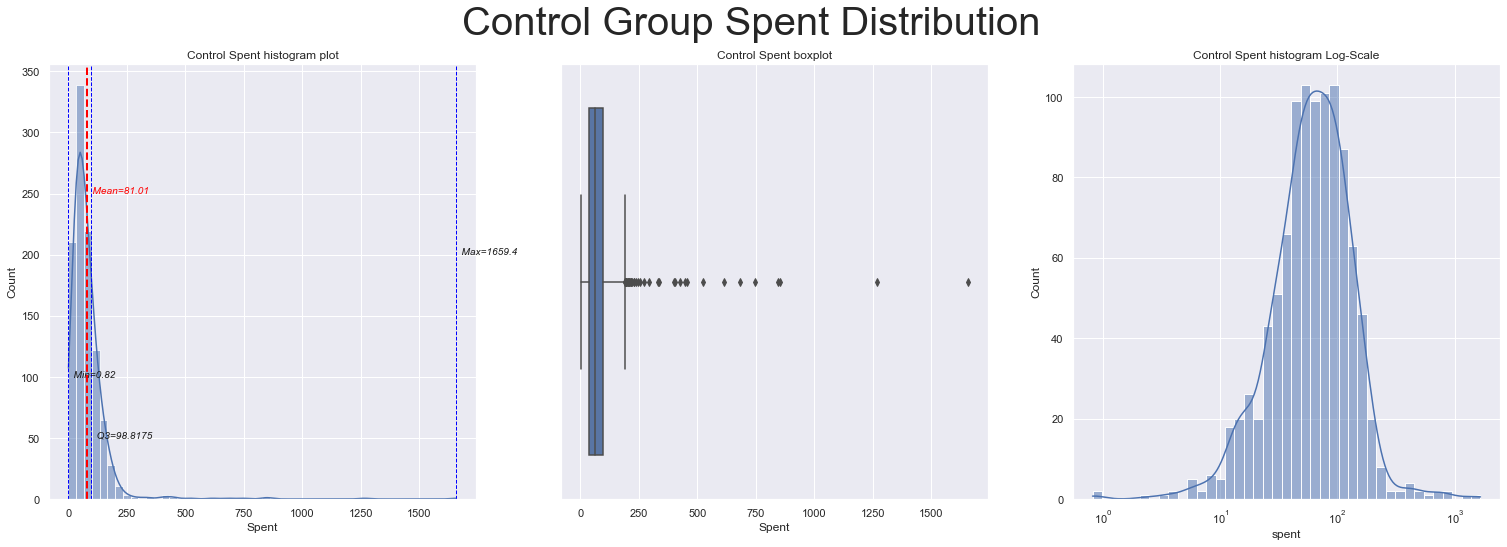

In [60]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[26, 8])

control_spent_mean = np.round(control_group["spent"].mean(), 2)
control_spent_min = np.round(control_group["spent"].min(), 2)
control_spent_max = np.round(control_group["spent"].max(), 2)

# main title:
fig.suptitle("Control Group Spent Distribution", fontsize=40)

# creating a histogram
sns.histplot(data=control_group, x="spent", bins=50, kde=True, ax = ax[0], color=base_color);
# creating a box plot
sns.boxplot(data=control_group, x="spent", ax=ax[1]);
# creating a log-scale histogram
sns.histplot(data=control_group, x='spent', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Control Spent histogram plot')
ax[1].set_title('Control Spent boxplot')
ax[2].set_title('Control Spent histogram Log-Scale')
ax[0].set_xlabel("Spent");
ax[1].set_xlabel("Spent");

# Measures of central tendency
print("Control Group Mean Spent: ", np.round(control_spent_mean, 2))
print("Control Group Median Spent: ", np.round(control_group["spent"].median(), 2))
print("Control Group Max Spent: ", np.round(control_spent_max, 2))
print("Control Group Mode Spent: ", control_group["spent"].mode()[0])

# Measures of dispersion
print("Control Group Range of Spent: ", control_spent_max - control_spent_min)
print("Control Group Interquartile range: ", control_group["spent"].quantile(0.75) - control_group["spent"].quantile(0.25))
print("Control Group Standard deviation: ", np.round(control_group["spent"].std(), 2))

#Outlier detection
control_spent_q1 = control_group["spent"].quantile(0.25)
control_spent_q3 = control_group["spent"].quantile(0.75)
control_iqr = control_spent_q3 - control_spent_q1
control_outliers = control_group[(control_group["spent"] < (control_spent_q1 - 1.5 * control_iqr)) | (control_group["spent"] > (control_spent_q3 + 1.5 * control_iqr))]
print("Number of outliers: ", control_outliers.shape[0])

ax[0].axvline(control_spent_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(control_spent_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(control_spent_q3, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(control_spent_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=control_spent_mean,
    y=250,
    s=f"  Mean={control_spent_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=control_spent_min,
    y=100,
    s=f"  Min={control_spent_min}",
    style="italic",
    color='k'
)
ax[0].text(
    x=control_spent_q3,
    y=50,
    s=f"  Q3={control_spent_q3}",
    style="italic",
    color='k'
)

ax[0].text(
    x=control_spent_max,
    y=200,
    s=f"  Max={control_spent_max}",
    style="italic",
    color='k'
)
plt.show()

### Test Group

Test Group Mean Spent:  68.43
Test Group Median Spent:  51.16
Test Group Max Spent:  1546.3
Test Group Mode Spent:  42.82
Test Group Range of Spent:  1545.96
Test Group Interquartile range:  51.16740802195446
Test Group Standard deviation:  89.44
Number of outliers:  58


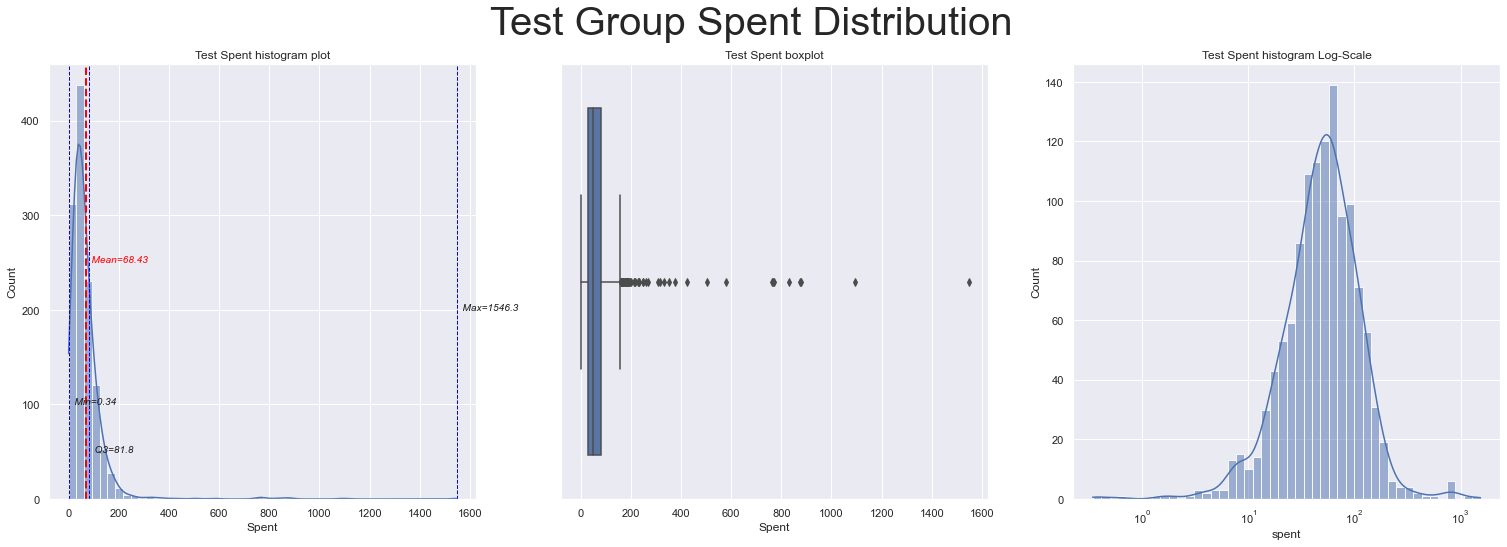

In [61]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[26, 8])

test_spent_mean = np.round(test_group["spent"].mean(), 2)
test_spent_min = np.round(test_group["spent"].min(), 2)
test_spent_max = np.round(test_group["spent"].max(), 2)

# main title:
fig.suptitle("Test Group Spent Distribution", fontsize=40)

# creating a histogram
sns.histplot(data=test_group, x="spent", bins=50, kde=True, ax = ax[0], color=base_color);
# creating a box plot
sns.boxplot(data=test_group, x="spent", ax=ax[1]);
# creating a log-scale histogram
sns.histplot(data=test_group, x='spent', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Test Spent histogram plot')
ax[1].set_title('Test Spent boxplot')
ax[2].set_title('Test Spent histogram Log-Scale')
ax[0].set_xlabel("Spent");
ax[1].set_xlabel("Spent");

# Measures of central tendency
print("Test Group Mean Spent: ", np.round(test_spent_mean, 2))
print("Test Group Median Spent: ", np.round(test_group["spent"].median(), 2))
print("Test Group Max Spent: ", np.round(test_spent_max, 2))
print("Test Group Mode Spent: ", test_group["spent"].mode()[0])

# Measures of dispersion
print("Test Group Range of Spent: ", test_spent_max - test_spent_min)
print("Test Group Interquartile range: ", test_group["spent"].quantile(0.75) - test_group["spent"].quantile(0.25))
print("Test Group Standard deviation: ", np.round(test_group["spent"].std(), 2))

#Outlier detection
test_spent_q1 = test_group["spent"].quantile(0.25)
test_spent_q3 = test_group["spent"].quantile(0.75)
test_iqr = test_spent_q3 - test_spent_q1
test_outliers = test_group[(test_group["spent"] < (test_spent_q1 - 1.5 * test_iqr)) | (test_group["spent"] > (test_spent_q3 + 1.5 * test_iqr))]
print("Number of outliers: ", test_outliers.shape[0])

ax[0].axvline(test_spent_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(test_spent_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(test_spent_q3, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(test_spent_max, color="blue", linestyle="dashed", linewidth=1)


ax[0].text(
    x=test_spent_mean,
    y=250,
    s=f"  Mean={test_spent_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=test_spent_min,
    y=100,
    s=f"  Min={test_spent_min}",
    style="italic",
    color='k'
)
ax[0].text(
    x=test_spent_q3,
    y=50,
    s=f"  Q3={test_spent_q3}",
    style="italic",
    color='k'
)

ax[0].text(
    x=test_spent_max,
    y=200,
    s=f"  Max={test_spent_max}",
    style="italic",
    color='k'
)
plt.show()

Additional Visuals can be found here: https://public.tableau.com/app/profile/lex.romo/viz/MasteryProject1_2_0/Story?publish=yes

